First we are going to import in all of the libraries which we will need for this assignment.  

In [145]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

**Question 1** 

Now will write a python function with the following inputs: $x_0$, $y_0$, $a$, $b$, and nvals.  It will work as follows: given starting values $x_0$ and $y_0$ and parameters $a$ and $b$, it will generate nvals where $x(n+1) = y(n) + 1 - ax(n)^2$ and $y(n+1)=bx(n)$.  It then return these results in a dataframe where the first column is n, second column is x, and third column is y.  

Then we will try running it twice, both where a = 1.4, b = 0.3, and nvals = 1000.  However, the starting values will differ: once with $x_0 = 0$ and $y_0 = 0$, and once with $x_0 = 0.3$ and $y_0 = 0.2$.  Then we'll set the index to the first row, our n, and then graph both of these.  Black will be the former starting values, while red will be the latter.  

In [146]:
def question1Sequence(x_0, y_0, a, b, nvals):
    #Creates a dataframe with the initial values
    results = pd.DataFrame(data ={'int': [0], 'x': [x_0], 'y': [y_0]}) 
    
    #Runs a forloop to generate the other values.  Since we need nvalues but start at 0, the range will get us the correct number even though it ends at nvalus - 1
    for n in range(1,nvals):
        #Calculates the next values of x and y
        xnew = y_0 + 1 - a* x_0**2
        ynew = b*x_0
        
        #Creates a temporary dataframe with just the new data and then appends that to the dataframe created above
        tempdata = pd.DataFrame(data ={'int': [n], 'x': [xnew], 'y': [ynew]})
        results = results.append(tempdata)
        
        #Resets x_0 and y_0 to the new values
        x_0 = xnew
        y_0 = ynew
    return results

Text(0.5,1,'Plotting x and y functions at different starting points')

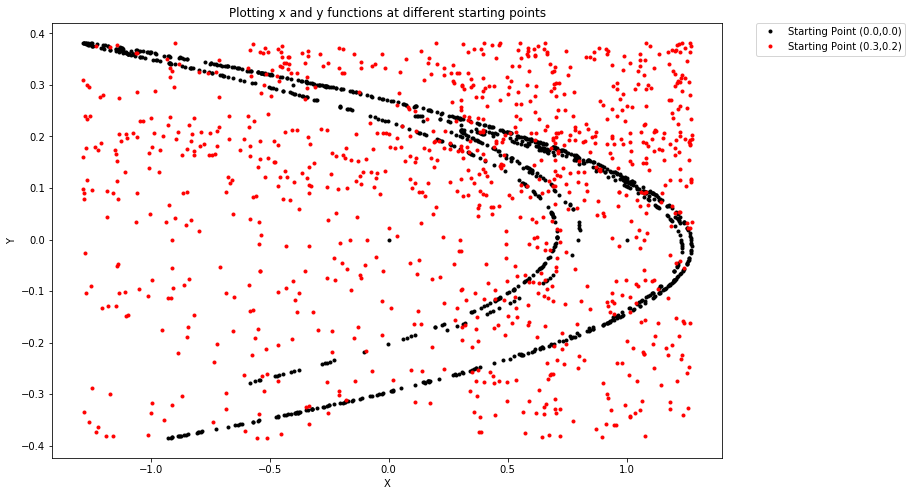

In [147]:
#Uses function to calculate values with first set of starting values
Round1 = question1Sequence(0.0,0.0,1.4,0.3,1000)
Round1 = Round1.set_index('int')

#Uses function to calculate values with second set of starting values
Round2 = question1Sequence(0.3,0.2,1.4,0.3,1000)
Round2 = Round2.set_index('int')

#Plots the points on a graph
plt.rcParams["figure.figsize"] = [12,8]
Round1Graph = plt.plot(Round1['x'], Round1['y'], 'ko', markersize=3, label = "Starting Point (0.0,0.0)")
Round1Graph = plt.plot(Round2['x'], Round1['y'], 'ro', markersize=3, label = "Starting Point (0.3,0.2)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plotting x and y functions at different starting points')


**Question 2**

We use the Pandas DataReader to download 20 years of historic London Bullion Market Association auction prices from FRED for both morning (AM) and afternoon (PM).  After this, we join the data, use the date to extrapolate what day of the week it is, and calculate the log of the intra-day return.  Then we take the average of the log of the intra-day return for each weekday.  

In [148]:
#First we create start and end dates to get data from.  It is over the course of 20 years.  
start = datetime.datetime(1998, 11, 17)
end = datetime.datetime(2018, 11, 17)

#Now we use those dates to get the London Bullion Market Association data from the FRED, both AM and PM
AMData = web.DataReader('GOLDAMGBD228NLBM', 'fred', start, end)
PMData = web.DataReader('GOLDPMGBD228NLBM', 'fred', start, end)

#Next we join these data sets, where AM and PM data are two separate columns
FullDay = AMData.join(PMData, how='inner')

#Create new variables for the date and the day of the week
FullDay['Date'] = FullDay.index
FullDay['DayOfWeek'] = FullDay['Date'].dt.day_name()

#Clean up the data
FullDay = FullDay.dropna()

#Calculate the log of the intra-day return
FullDay['LogIntraDayReturn'] = np.log(FullDay['GOLDPMGBD228NLBM']) - np.log(FullDay['GOLDAMGBD228NLBM'])

#Calculate the average of the log of the intra day return for each weekday
FullDay.groupby('DayOfWeek').mean().loc[:,'LogIntraDayReturn']

DayOfWeek
Friday       0.000113
Monday      -0.000552
Thursday    -0.000336
Tuesday     -0.000485
Wednesday   -0.000613
Name: LogIntraDayReturn, dtype: float64

**Question 3**

*Part A*

We load in the data, then sort it by column 1 and then column 2.  Then we reset the index, and print the results.  

In [149]:
#Load the data, sort it on the first two columns, then reset the index
SortingCSV = pd.read_csv('Sorting.csv', header = None, names = ['Col1', 'Col2', 'Col3'])
SortedCSV = SortingCSV.sort_values(by = ['Col1', 'Col2'])
SortedCSV.reset_index(drop = True)

,Col1,Col2,Col3
0,0,3,6
1,0,6,7
2,0,7,8
3,1,3,5
4,1,5,3
5,1,6,8
6,1,7,0
7,1,8,8
8,1,9,1
9,1,9,8


*Part B*

Next we randomly shuffle the dataset (take a random sample without replacement using the entire set), and then reset the index again.  

In [150]:
#Randomly shuffle the dataset, and then reset the index
SampleCSV = SortingCSV.sample(frac = 1)
SampleCSV.reset_index(drop = True)

,Col1,Col2,Col3
0,2,7,2
1,0,3,6
2,1,5,3
3,0,6,7
4,1,6,8
5,6,0,9
6,1,7,0
7,1,3,5
8,8,9,9
9,1,9,1


*Part C*

Now we import the data from the string into a numpy array.  Then we order it into ascending order based on the first column using *argsort*.  

In [151]:
#Read in the data 
data="1.0,3.482\n4.0,-8.342\n-2.0,6.825\n7.0,5.982\n10.0,8.284"

#Split it by lines
mysplit = data.split('\n')

#Split each line into values and then save that into an array
fulldata = []
for i in mysplit:
    mysplit2 = i.split(',')
    tempdata = []
    for j in mysplit2:
        tempdata.append(float(j))
    fulldata.append(tempdata)

#Convert the array into a numpy array
fulldata = np.array(fulldata)

#Use argsort to order the array based on the first column
order = np.argsort(fulldata, axis = 0)[:,0]
fulldata[[order],:]

array([[[-2.   ,  6.825],
        [ 1.   ,  3.482],
        [ 4.   , -8.342],
        [ 7.   ,  5.982],
        [10.   ,  8.284]]])

**Question 4** 

Here, we read in the data from the excel file and clean it up.  We are interested in the top part of Table 4 from the file, which is the current prices.  Using this data, we create a stacked bar chart so the changes overall, as well as within and between sectors can be analyzed.  

Text(0.5,1,'Expenditure on R&D in the UK by Sector of Funding')

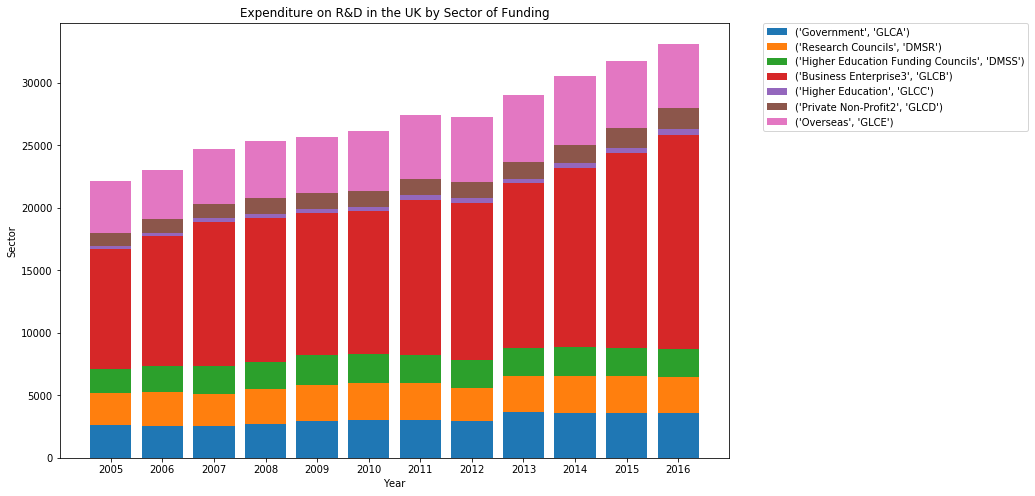

In [152]:
#First we read in the data, and clean it
rftgerd = pd.read_excel("rftgerddatasets2016.xls", sheet_name = "Table 4", header = 3)
rftgerd.reset_index(level=0, drop=True, inplace = True)
rftgerd = rftgerd.iloc[list(range(7, 14)) + [5] , [0] + list(range(2,11)) + [12] + [14] ]

#Make a list of the years
years = range(2005,2017)

#Plot a stacked bar chart using a forloop
for i in range(0,7):
    if i == 0:
        plt.bar(years, rftgerd.iloc[i,:])
    else:
        plt.bar(years, rftgerd.iloc[i,:], bottom=rftgerd.iloc[list(range(0,i)),:].sum(axis = 0))

#Clean up the chart and make it pretty, adding labels and legend
plt.xticks(years)
plt.legend(rftgerd.index.values.tolist() , bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Sector')
plt.xlabel('Year')
plt.title('Expenditure on R&D in the UK by Sector of Funding')